In [3]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
url = "http://books.toscrape.com/"
#Fetching yapıyoruz/Web sitesinden veri çekiyoruz
response = requests.get(url)
#Ham HTML’i, Python’un anlayıp sorgulayabileceği bir yapıya çeviriyoruz
soup = BeautifulSoup(response.content, "html.parser")

In [11]:
type(soup)

bs4.BeautifulSoup

In [12]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

In [13]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

Bir kitabı parse'lama

In [14]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [15]:
type(books_html[0])

bs4.element.Tag

In [17]:
books_html[0].find("h3").find("a")

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [18]:
books_html[0].find("h3").find("a").attrs

{'href': 'catalogue/a-light-in-the-attic_1000/index.html',
 'title': 'A Light in the Attic'}

In [19]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [20]:
books_html[0].find("p", class_="price_color").string

'£51.77'

In [22]:
book_price = float(books_html[0].find("p", class_="price_color").string[1:])
book_price                

51.77

In [23]:
type(book_price)

float

In [34]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [35]:
book_stars_html.attrs["class"]

['star-rating', 'Three']

In [39]:
def parse_rating(rating_classes):
    ratings = {
        "One": 1,
        "Two": 2,
        "Three": 3,
        "Four": 4,
        "Five": 5
    }

    for rating in ratings:
        if rating in rating_classes:
            return ratings[rating]

    return 0


In [40]:
book_rating = parse_rating(
    books_html[0].find("p", class_="star-rating").attrs["class"]
)
book_rating

3

Tüm kitapları parse'lama

In [41]:
books_dict = {
    "Title": [],
    "Price": [],
    "Rating": []
}

In [43]:
for book in books_html:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])

    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

In [44]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [45]:
len(books_dict)

3

In [46]:
len(books_dict["Title"])

20

## Pandas_load

In [47]:
books_df = pd.DataFrame(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<Axes: xlabel='Rating'>

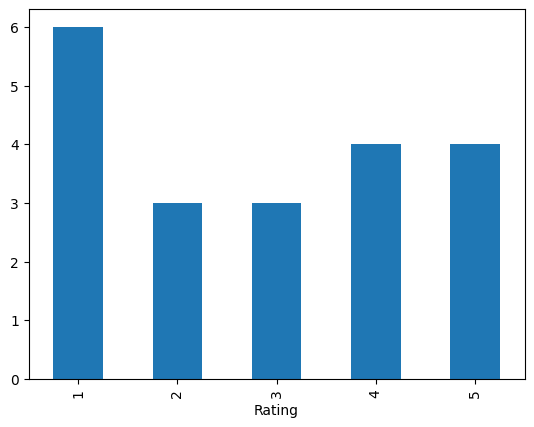

In [48]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [49]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "books",
    columns=books_df.columns,
    title=str(books_df.loc[0, "Title"]),
    price=books_df.loc[0, "Price"],
    rating=books_df.loc[0, "Rating"]
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/data-book-scraping/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.91s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master

